In [13]:
from glob import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from network import SimpleUNet
from dataset import DataLoader
from utils import get_polygon

In [8]:
autoencoder = SimpleUNet()
autoencoder.load_weights('my_weights.h5')

In [9]:
val_mask_dir = "data/annotations/test/"
val_images = glob(os.path.join(val_mask_dir, "*"))

target_shape=(64, 64)
batch_size = 16

val_dataset = DataLoader(val_mask_dir, target_shape=target_shape)
val_generator = val_dataset.data_generator(batch_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [14]:
%time
inputs, targets = next(iter(val_generator))
preds = autoencoder.predict(inputs)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 10.5 µs


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


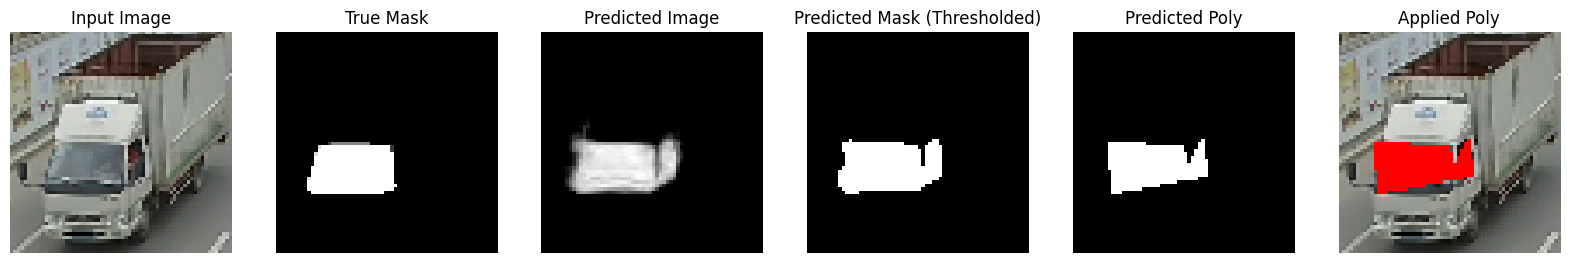

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


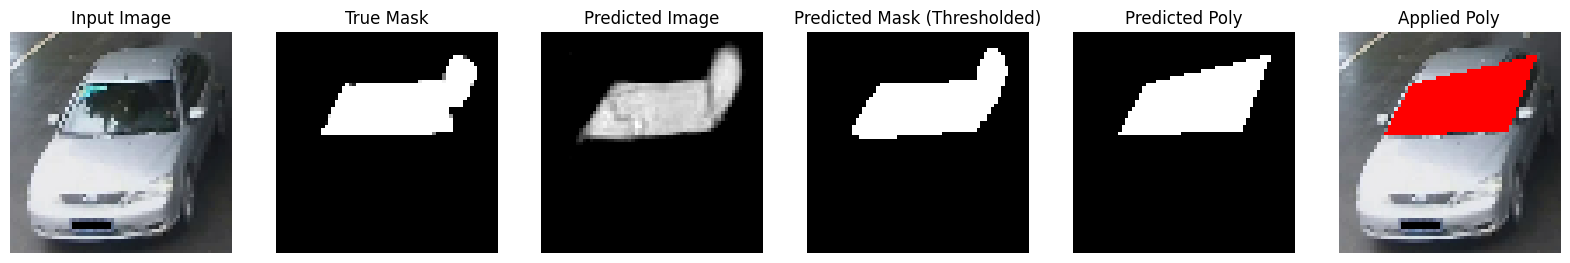

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


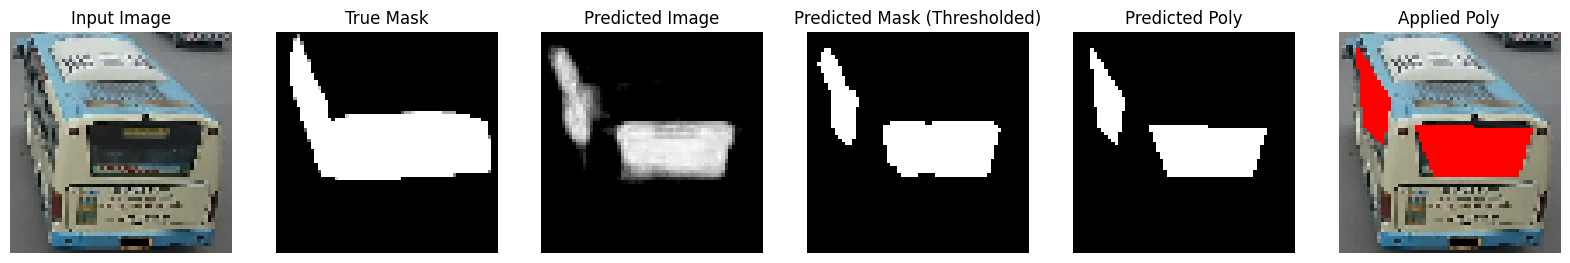

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


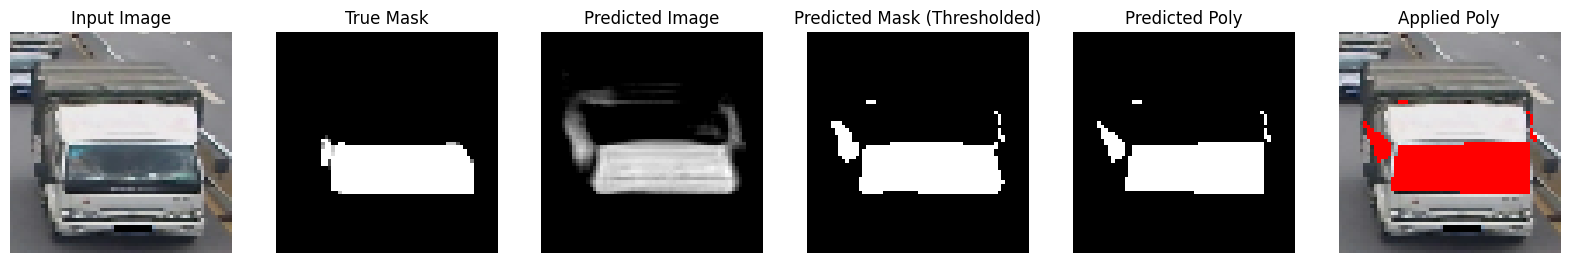

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


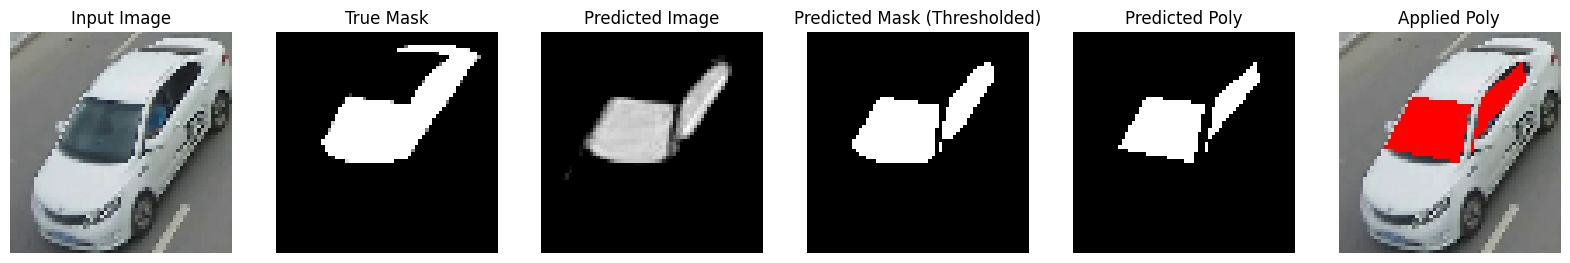

In [15]:
plt.rcParams["figure.figsize"] = (20, 5)

threshold = 0.5
ii = 0

for i, p, t in zip(inputs, preds, targets):

    plt.subplot(1, 6, 1)
    plt.imshow(i)
    plt.title("Input Image")
    plt.axis("off")
    
    plt.subplot(1, 6, 3)
    op = p.copy()
    plt.imshow(op, cmap="gray")
    plt.title("Predicted Image")
    plt.axis("off")
    
    plt.subplot(1, 6, 4)
    p[p < threshold] = 0
    p[p >= threshold] = 1
    plt.imshow(p, cmap="gray")
    plt.title("Predicted Mask (Thresholded)")
    plt.axis("off")
    
    plt.subplot(1, 6, 2)
    plt.imshow(t, cmap="gray")
    plt.title("True Mask")
    plt.axis("off")
    
    plt.subplot(1, 6, 5)
    poly = get_polygon(p)
    plt.imshow(poly, cmap="gray")
    plt.title("Predicted Poly")
    plt.axis("off")
    
    plt.subplot(1, 6, 6)
    indices = np.where(poly==255)
    # use custom color for the mask
    iii = cv2.bitwise_and(i.numpy(), i.numpy(), mask=cv2.bitwise_not(poly))
    iii[indices[0], indices[1], :] = [255, 0, 0]
    plt.imshow(iii, cmap="gray")
    
    plt.title("Applied Poly")
    plt.axis("off")
    plt.show()
    
    ii += 1
    if ii == 5: break